In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.3.1


In [2]:
# import gzip
# import shutil
# # C:\Users\allro\JupyterNotebook\QTW\Data
# with gzip.open('C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv.gz', 'rb') as f_in:
#    with open('C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv', 'wb') as f_out:
#        shutil.copyfileobj(f_in, f_out)

In [3]:
#https://archive.ics.uci.edu/ml/datasets/HIGGS#
df = pd.read_csv("./Data/HIGGS.csv", header=None)
# df = pd.read_csv("../../HIGGS.csv", header=None)

In [4]:
df.columns =['target', 'lepton_ph', 'lepton_eta', 'lepton_phi','missing_energy_magnitude','missing_energy_phi',
             'jet_1_pt','jet_1_eta','jet_1_phi','jet_1_btag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_btag',
             'jet_3_pt','jet_3_eta','jet_3_phi','jet_3_btag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_btag',
             'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb'] 

In [5]:
# Print out the data types
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   target                    float64
 1   lepton_ph                 float64
 2   lepton_eta                float64
 3   lepton_phi                float64
 4   missing_energy_magnitude  float64
 5   missing_energy_phi        float64
 6   jet_1_pt                  float64
 7   jet_1_eta                 float64
 8   jet_1_phi                 float64
 9   jet_1_btag                float64
 10  jet_2_pt                  float64
 11  jet_2_eta                 float64
 12  jet_2_phi                 float64
 13  jet_2_btag                float64
 14  jet_3_pt                  float64
 15  jet_3_eta                 float64
 16  jet_3_phi                 float64
 17  jet_3_btag                float64
 18  jet_4_pt                  float64
 19  jet_4_eta                 float64
 20  jet_4_phi             

In [6]:
df.head()

,target,lepton_ph,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [7]:
#subsample the data
train = df.sample(n=2700000, random_state=123)

In [8]:
#figure out which columns have values strictly greater than 0, for scaler purposes
pd.set_option("display.max_rows", 500, "display.max_columns", None)
df.describe()

,target,lepton_ph,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_btag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_btag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,9.927294e-01,-1.026444e-05,-2.076887e-05,1.000008e+00,9.922591e-01,1.459561e-05,3.678632e-06,1.000011e+00,9.861087e-01,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,4.999939e-01,1.009331e+00,1.006154e+00,1.049398e+00,4.876623e-01,1.008747e+00,1.006305e+00,1.193676e+00,5.057777e-01,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.564608e-01,-6.944718e-01,-8.701791e-01,0.000000e+00,6.508527e-01,-6.998083e-01,-8.711343e-01,0.000000e+00,6.177673e-01,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,8.901377e-01,6.027267e-05,3.514990e-04,0.000000e+00,8.972494e-01,1.728937e-04,-7.519117e-04,0.000000e+00,8.682333e-01,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,1.201875e+00,6.945924e-01,8.698727e-01,2.214872e+00,1.221798e+00,7.001541e-01,8.713947e-01,2.548224e+00,1.220930e+00,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.470899e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [9]:
train.shape

(2700000, 29)

In [10]:
y = train['target']
pre_X = train.loc[:, df.columns != 'target']

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_train = scaler.fit_transform(pre_X)
# X = pd.DataFrame(data=scaled_train, columns=pre_X.columns)

In [11]:
#not complete, need columns where mean=1 and stdev=1
from sklearn.preprocessing import StandardScaler

#NOT strictly greater than 0 columns:
not_greater_than_0 = ['lepton_eta','lepton_phi','missing_energy_phi','jet_1_eta','jet_1_phi','jet_1_btag',
                      'jet_2_eta','jet_2_phi','jet_2_btag','jet_3_eta','jet_3_phi','jet_3_btag','jet_4_eta',
                      'jet_4_phi','jet_4_btag']

#strictly greater than 0 columns:
greater_than_0 = ['lepton_ph','missing_energy_magnitude','jet_1_pt','jet_2_pt','jet_4_pt','jet_3_pt','m_jj','m_jjj','m_lv',
                  'm_jlv','m_bb','m_wbb','m_wwbb']


#these columns scale where mean=0 and stdev=1
to_scale1 = pre_X[not_greater_than_0]
scaler = StandardScaler()
scaled_train1 = scaler.fit_transform(to_scale1)
scaled_train_df1 = pd.DataFrame(scaled_train1, columns=not_greater_than_0)

#these columns scale where mean=1 and stdev=1
to_scale2 = pre_X[greater_than_0]
scaler = StandardScaler()
scaled_train2 = scaler.fit_transform(to_scale2)
scaled_train_df2 = pd.DataFrame(scaled_train2 + 1, columns=greater_than_0)
scaled_train_df2.describe()

,lepton_ph,missing_energy_magnitude,jet_1_pt,jet_2_pt,jet_4_pt,jet_3_pt,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06
mean,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.692487e-01,-6.629512e-01,-7.967572e-01,-6.074943e-01,-2.265871e-01,-4.950758e-01,-4.220156e-01,-1.085173e+00,-4.671580e+00,-9.966205e-01,-7.559246e-01,-9.419313e-01,-1.007835e+00
25%,2.908678e-01,2.968943e-01,3.429320e-01,3.271923e-01,2.718457e-01,2.992779e-01,6.381188e-01,5.307538e-01,6.057886e-01,3.902915e-01,4.298066e-01,4.148734e-01,3.951421e-01
50%,7.557421e-01,8.220869e-01,7.979593e-01,7.947874e-01,7.664334e-01,8.048903e-01,7.926950e-01,8.047980e-01,6.302639e-01,7.658522e-01,8.107875e-01,7.650829e-01,7.195584e-01
75%,1.432806e+00,1.489998e+00,1.378312e+00,1.417912e+00,1.464336e+00,1.471895e+00,9.854704e-01,1.154234e+00,8.180723e-01,1.333397e+00,1.316039e+00,1.293715e+00,1.317042e+00
max,1.990920e+01,2.074365e+01,1.696608e+01,1.894492e+01,2.449078e+01,2.913666e+01,4.320711e+01,3.757437e+01,3.610837e+01,2.720738e+01,2.530791e+01,2.222779e+01,1.903306e+01


In [12]:
X = pd.concat([scaled_train_df1, scaled_train_df2], axis=1, sort=False)
X.head()

,lepton_eta,lepton_phi,missing_energy_phi,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_eta,jet_2_phi,jet_2_btag,jet_3_eta,jet_3_phi,jet_3_btag,jet_4_eta,jet_4_phi,jet_4_btag,lepton_ph,missing_energy_magnitude,jet_1_pt,jet_2_pt,jet_4_pt,jet_3_pt,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,-0.322698,0.863974,-0.572394,-2.141910,-0.523331,-0.972394,1.723271,-1.709735,-0.952721,0.025320,1.289849,1.297086,-0.002550,-0.786780,-0.714623,1.174615,0.159987,-0.131955,0.571056,0.458818,0.872077,0.537612,1.043725,0.613531,0.855936,1.105111,1.271763,0.857708
1,0.416012,0.695230,0.802569,-0.470268,-0.668259,-0.972394,-0.789962,-1.505089,1.157959,0.801986,-0.192636,-0.837719,0.480992,1.476245,-0.714623,0.509861,4.282156,1.223487,2.620370,1.344654,2.940999,0.587596,0.553747,0.652961,2.779117,0.708717,1.379849,1.777530
2,-0.014661,0.186240,-1.239508,1.129761,-1.392889,-0.972394,0.016351,1.064402,-0.952721,-0.055865,-0.051011,1.297086,2.108505,-0.857342,-0.714623,-0.131244,0.969650,0.063167,1.851028,1.313412,2.026322,0.902170,1.344268,0.611708,0.130099,0.414188,0.216856,0.344891
3,-1.836813,-1.475939,0.854717,2.403113,-1.289843,-0.972394,0.352154,0.411299,1.157959,-0.669259,0.629665,-0.837719,0.763678,-0.477521,1.500356,0.975059,-0.110719,0.357007,0.772892,2.591457,1.104799,0.865539,1.335576,0.656481,1.386006,0.819831,1.213939,0.938051
4,2.177330,0.531449,-1.001947,0.825647,0.737572,-0.972394,1.490422,-0.738907,-0.952721,-0.137049,1.333935,1.297086,1.046365,-0.080614,0.392867,-0.051552,2.578418,0.874119,0.138191,1.611414,0.954575,0.795093,1.126712,1.901500,2.499413,1.154604,1.196780,1.718207


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=100000, random_state=1776)

In [14]:
# y = y_train.to_numpy()
# type(np.unique(y)[0])

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [15]:
from tensorflow.keras import initializers

model = tf.keras.Sequential()
# input
model.add(tf.keras.Input(shape=(28,)))
# hidden
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.1)))  
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(1,
                       activation='sigmoid',
                       kernel_initializer=initializers.RandomNormal(stddev=0.001)))  


In [20]:
#change learning rate and add stopping criteria
#momentum not working here
from tensorflow.keras import optimizers

# def scheduler(epoch, lr):
#     if epoch == 1:
#         return float(0.05)
#     else:
#         if lr * (1-1.0000002) < 0.000001:
#             return float(lr)
#         else:
#             return float(lr * (1-1.0000002))
        
# not using
# def mmnt(epoch,moment):
#     if epoch == 1:
#         return float(0.9)
#     else:
#         if epoch <= 200:
#             return float(moment + 0.00045)
#         else:
#             return float(0.99)


# def scheduler(epoch, lr):
#     if epoch == 0:
#         return 0.05
#     else:
#         return max(0.05 * tf.math.exp(-1.0000002*epoch), 10e-6)

#The learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10−6
def scheduler(epoch):
    initial_lrate = 0.05
    k = 1.0000002
    lrate = initial_lrate * tf.math.exp(-k*epoch)
    return max(lrate, 10e-6)

# opt = tf.keras.optimizers.SGD(momentum=.9)
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#set early stopping criteria
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001 , patience=10)

mom = tf.Variable(0.9)
opt = tf.optimizers.SGD(momentum=mom, nesterov=True)
print(opt.get_config())
# mom.assign(0.999)
# print(opt.get_config())

#opt = tf.compat.v1.train.MomentumOptimizer(learning_rate=.05, momentum=mmnt, use_locking=False, name='Momentum', use_nesterov=False)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])

{'name': 'SGD', 'learning_rate': 0.01, 'decay': 0.0, 'momentum': 0.9, 'nesterov': True}


In [21]:
import keras

# this is doing something that is affecting the AUC so I'm not using it for now
# no idea what is going on with it
class CustomCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))
#         print(opt.get_config())
        lr = self.model.optimizer.lr
        tf.summary.scalar('learning rate', data=lr, step=epoch)

In [22]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
training_history = model.fit(x_train, y_train, epochs=250, validation_data=(x_test,y_test), batch_size=100,
          callbacks=[lr_callback,es_callback
#                      , CustomCallback()
                    ])
# model.fit(x_train, y_train, epochs=250, validation_data=(x_test,y_test), batch_size=100, callbacks=[lr_callback,es_callback])

Epoch 1/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.5057 - auc: 0.8286 - val_loss: 0.5014 - val_auc: 0.8332
Epoch 2/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.4868 - auc: 0.8427 - val_loss: 0.4868 - val_auc: 0.8433
Epoch 3/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.4773 - auc: 0.8494 - val_loss: 0.4803 - val_auc: 0.8474
Epoch 4/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.4729 - auc: 0.8525 - val_loss: 0.4797 - val_auc: 0.8478
Epoch 5/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.4709 - auc: 0.8539 - val_loss: 0.4788 - val_auc: 0.8487
Epoch 6/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.4701 - auc: 0.8544 - val_loss: 0.4784 - val_auc: 0.8489
Epoch 7/250
26000/26000 [==============================] - 59s 2ms/step - loss: 0.4697 - auc: 0.8547 - val_loss: 0.4783 - val_auc: 0.8490
Epoch 8/250
26000/26000 [=========

In [24]:
%load_ext tensorboard
%tensorboard --logdir logs/scalars

Reusing TensorBoard on port 6006 (pid 24088), started 4:14:42 ago. (Use '!kill 24088' to kill it.)

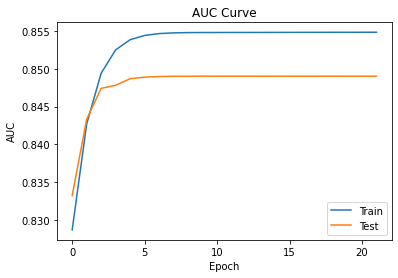

In [28]:
import matplotlib.pyplot as plt

train_loss = model.history.history['auc']
val_loss = model.history.history['val_auc']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('AUC Curve')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.show()

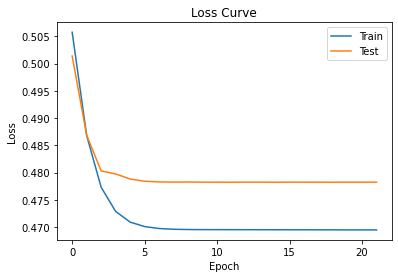

In [29]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()